In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation, BatchNormalization, InputLayer, GlobalAveragePooling2D
from keras.regularizers import l1

Using TensorFlow backend.


In [2]:
# Load dataset
from keras.datasets import cifar10
(x_train, y_train_raw), (x_test, y_test_raw) = cifar10.load_data()
#from keras.datasets import cifar100
#(x_train, y_train_raw), (x_test, y_test_raw) = cifar100.load_data()

# Make sure they are of type float and within [0,255]
x_train = x_train.astype('float64') / 255.0
x_test = x_test.astype('float64') / 255.0
# Convert numeric label into one-hot encodding
y_train = np_utils.to_categorical(y_train_raw)
y_test = np_utils.to_categorical(y_test_raw)
# Print info
print("Training set:")
print(x_train.shape)
print(y_train.shape)
print("Test set:")
print(x_test.shape)
print(y_test.shape)

Training set:
(50000, 32, 32, 3)
(50000, 10)
Test set:
(10000, 32, 32, 3)
(10000, 10)


Examples of the dataset (test set):


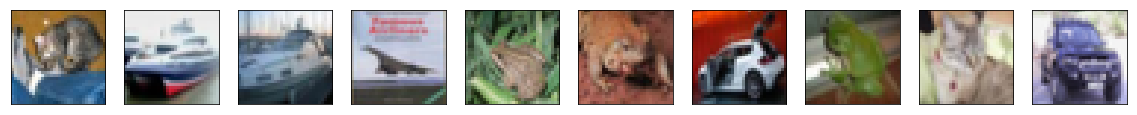

In [3]:
# Show some examples of the MNIST dataset (the first 10 instances)
print("Examples of the dataset (test set):")
plt.figure(figsize=(20, 4))
for i in range(10):
    ax = plt.subplot(1, 10, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

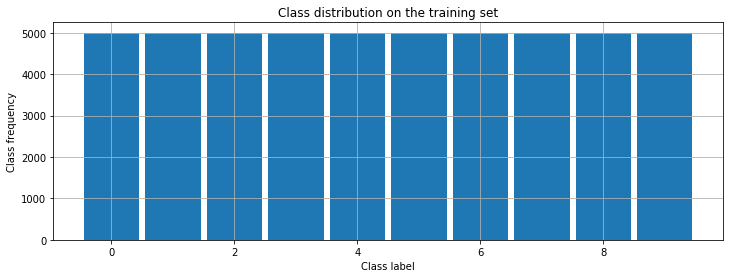

In [4]:
# Print frequencies of each class, i.e., number of instances per class
plt.figure(figsize=(12, 4))
plt.hist(y_train_raw, np.linspace(-0.5, 9.5, y_train.shape[1]+1), rwidth=0.9)
plt.title("Class distribution on the training set")
plt.xlabel("Class label")
plt.ylabel("Class frequency")
plt.grid()
# you will see that the dataset is more or less well balanced

In [5]:
# Split train into train and validation
validation_rate = 0.2
n_train_samples = round(validation_rate * len(x_train))
print("Taking {} validation samples".format(n_train_samples))
x_val = x_train[:n_train_samples]
y_val = y_train[:n_train_samples]
x_train = x_train[n_train_samples:]
y_train = y_train[n_train_samples:]
print("Training set:")
print(x_train.shape)
print(y_train.shape)
print("Validation set:")
print(x_val.shape)
print(y_val.shape)

Taking 10000 validation samples
Training set:
(40000, 32, 32, 3)
(40000, 10)
Validation set:
(10000, 32, 32, 3)
(10000, 10)


In [26]:
# Build your model architecture (layers with activations), and print summary
_, n_rows, n_cols, n_chans = x_train.shape
model = Sequential()
model.add(InputLayer(input_shape=(n_rows, n_cols, n_chans)))
model.add(BatchNormalization())

model.add(Conv2D(32, (5, 5), padding='same', activation='elu'))
model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same', activation='elu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='elu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same', activation='elu'))
model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(BatchNormalization())

#model.add(InputLayer(input_shape=(n_rows, n_cols, n_chans)))

#model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#model.add(Conv2D(64, (3, 3), padding='same'))
#model.add(BatchNormalization())
#model.add(Activation('relu'))
#model.add(MaxPool2D(pool_size=(2, 2)))

#model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#model.add(Conv2D(128, (3, 3), padding='same'))
#model.add(BatchNormalization())
#model.add(Activation('relu'))
#model.add(MaxPool2D(pool_size=(2, 2)))

#model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
#model.add(Conv2D(256, (3, 3), padding='same'))
#model.add(BatchNormalization())
#model.add(Activation('relu'))
#model.add(MaxPool2D(pool_size=(2, 2)))

#model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(256, activation='elu', kernel_regularizer=l1(3e-4)))
#model.add(Dense(64, activation='relu'))
model.add(Dense(units=y_train.shape[1], activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_22 (Batc (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 8, 8, 64)          256       
__________

In [27]:
# Compile your model (define optimizer and loss function)
model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
# Train your model
num_epochs = 20
losses = np.zeros((num_epochs, 2))
accura = np.zeros((num_epochs, 2))
print(f"Training on {x_train.shape[0]} samples - validating on {x_val.shape[0]} samples.")
for epoch in range(num_epochs):
    print(f"Epoch: {epoch+1:3d} -- ", end="")
    model.fit(x_train, y_train, epochs=1, batch_size=128, verbose=False)
    losses[epoch, 0], accura[epoch, 0] = model.evaluate(x_train, y_train, verbose=False)
    losses[epoch, 1], accura[epoch, 1] = model.evaluate(x_val, y_val, verbose=False)
    print(f"Train loss: {losses[epoch, 0]:6.4f}, acc: {accura[epoch, 0]:6.4f} -- Val loss: {losses[epoch, 1]:6.4f}, acc: {accura[epoch, 1]:6.4f}")

Training on 40000 samples - validating on 10000 samples.
Epoch:   1 -- Train loss: 2.7584, acc: 0.4269 -- Val loss: 2.7783, acc: 0.4286
Epoch:   2 -- Train loss: 1.6935, acc: 0.5620 -- Val loss: 1.7373, acc: 0.5453
Epoch:   3 -- Train loss: 1.4439, acc: 0.6321 -- Val loss: 1.5071, acc: 0.6129
Epoch:   4 -- Train loss: 1.1832, acc: 0.7065 -- Val loss: 1.2894, acc: 0.6745
Epoch:   5 -- Train loss: 1.0388, acc: 0.7558 -- Val loss: 1.1743, acc: 0.7069
Epoch:   6 -- Train loss: 1.0348, acc: 0.7606 -- Val loss: 1.2119, acc: 0.7064
Epoch:   7 -- Train loss: 0.9397, acc: 0.7905 -- Val loss: 1.1695, acc: 0.7182
Epoch:   8 -- Train loss: 0.9569, acc: 0.7883 -- Val loss: 1.2386, acc: 0.7136
Epoch:   9 -- Train loss: 0.9566, acc: 0.7962 -- Val loss: 1.2948, acc: 0.7076
Epoch:  10 -- Train loss: 0.8894, acc: 0.8128 -- Val loss: 1.2810, acc: 0.7124
Epoch:  11 -- Train loss: 0.7783, acc: 0.8484 -- Val loss: 1.2498, acc: 0.7272
Epoch:  12 -- Train loss: 0.7025, acc: 0.8803 -- Val loss: 1.2142, acc: 0.

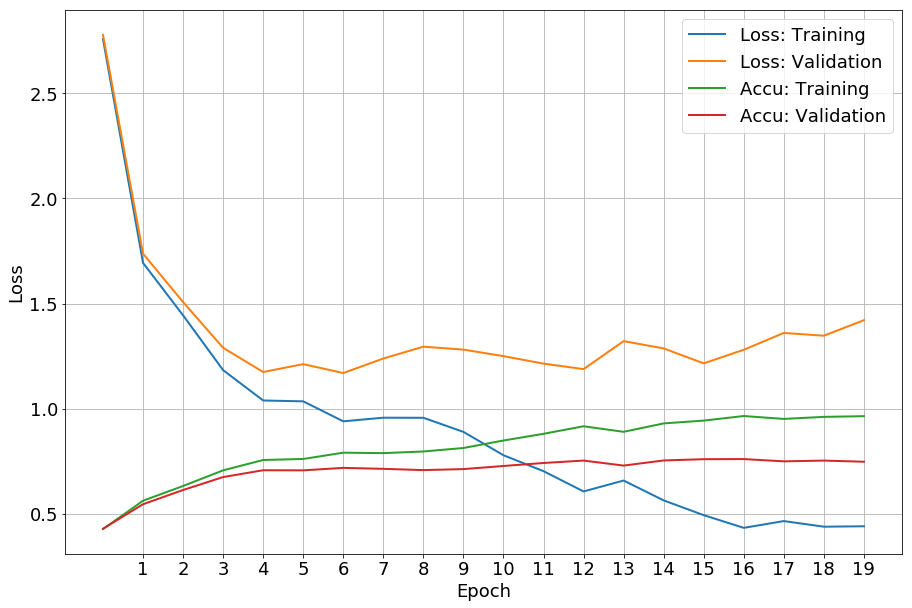

In [29]:
# Plot training history
plt.figure(figsize=(15, 10))
plt.plot(losses[:, 0], label='Loss: Training', linewidth=2)
plt.plot(losses[:, 1], label='Loss: Validation', linewidth=2)
plt.plot(accura[:, 0], label='Accu: Training', linewidth=2)
plt.plot(accura[:, 1], label='Accu: Validation', linewidth=2)
plt.legend(fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Loss", fontsize=18)
#plt.ylim([0, 0.5])
plt.xticks(np.arange(1, len(losses)))
plt.tick_params(labelsize=18)
plt.grid()
#plt.show()

In [30]:
# Make predictions for test set and evaluate performance
y_hat = model.predict(x_test)
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test loss: {:6.4f}, acc: {:6.4f}".format(test_loss, test_acc))

10000/10000 [==============================] - 21s 2ms/step
Test loss: 1.4454, acc: 0.7485


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

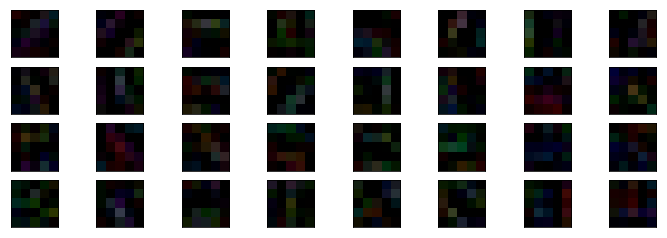

In [46]:
W = model.layers[1].get_weights()[0]
plt.figure(figsize=(12, 4))
for i in range(32):
    ax = plt.subplot(4, 8, i + 1)
    plt.imshow(W[:, :, :, i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [48]:
b = model.layers[1].get_weights()[1]
print(b.shape)
print(b)

(32,)
[ 0.14126119 -0.2912288  -0.04807041  0.05882772 -0.08967331 -0.1664253
 -0.1229009  -0.27093464 -0.17934185 -0.09067541 -0.11018961 -0.1977734
 -0.00069682 -0.15318197 -0.02506106 -0.2464545  -0.21697459 -0.08888941
 -0.09206767 -0.20580079 -0.05233438 -0.17630908 -0.1137303  -0.31360605
  0.06516082 -0.15045874 -0.2527384  -0.26436922 -0.08558565 -0.15276615
 -0.12790255 -0.11297141]
